<a href="https://colab.research.google.com/github/prakashgyan/Visualization/blob/master/Candlestick_Plot_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports and Installation of Libraries

In [2]:
!ls
!pip install mpl_finance # package for Candlestick Plot

sample_data


In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates

## Data Loading And Prepareation



### Loading to df

In [15]:
FILENAME = 'EOD_SQ_daily_ta_values - EOD_SQ_daily_ta_values.csv'

In [16]:
data = pd.read_csv(FILENAME,parse_dates = ['date']) #make sure to have the .csv data file in the same directory as this notebook

In [17]:
latest_data = data.sort_values('date',ascending=False).head(120) # getting last 120 records 

### Data for Candlestick

In [18]:
ohlc = latest_data[['date','open','high','low','close']] 

In [19]:
ohlc['date'] = ohlc['date'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Data for Columns

*Change these hyper-Parameters for altering colors and columns :*

In [20]:
## Hyper-Parameters 
required_columns = ['pos_3_atr',	'pos_2_atr',	'pos_1_atr',	'ema20',	'sma20',
                    'neg_1_atr',	'neg_2_atr',	'neg_3_atr',	'bollinger_band_top',
                    'bollinger_band_bottom',	'squeeze_keltner_upper',	'squeeze_keltner_lower'] # add or remove columns 

colors = {
    'pos_3_atr':'#22a565',
    'pos_2_atr':'#ccaf11',
    'pos_1_atr':'#cc2311',
    'ema20':	'#3acc11',
    'sma20':	'#4311cc',
    'neg_1_atr':'#cc2311',
    'neg_2_atr':'#ccaf11',
    'neg_3_atr':	'#22a565',
    'bollinger_band_top':	'#1186cc',
    'bollinger_band_bottom':	'#1186cc',
    'squeeze_keltner_upper':	'#cc119d',
    'squeeze_keltner_lower':	'#cc119d',
    'squeeze_boolean_TRUE':'#fffb15',
    'squeeze_boolean_FALSE':	'#333' # chnage colors as you like
}

In [21]:
lp_data = latest_data[['date']+required_columns]

In [22]:
lp_data['date']= lp_data['date'].apply(mpl_dates.date2num)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Data for Circles

In [23]:
## sqz_bools

circles = latest_data[['date','squeeze_boolean']]
circles['squeeze_boolean_TRUE'] = circles.squeeze_boolean.apply(lambda x : 1 if x == True else None)
circles['squeeze_boolean_FALSE'] = circles.squeeze_boolean.apply(lambda x : 1 if x == False else None)
circles['date']= circles['date'].apply(mpl_dates.date2num)
circles = circles.drop('squeeze_boolean',axis=1)
cir_columns = ['squeeze_boolean_TRUE','squeeze_boolean_FALSE']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

## Plotting 

In [24]:
plt.style.use('ggplot')

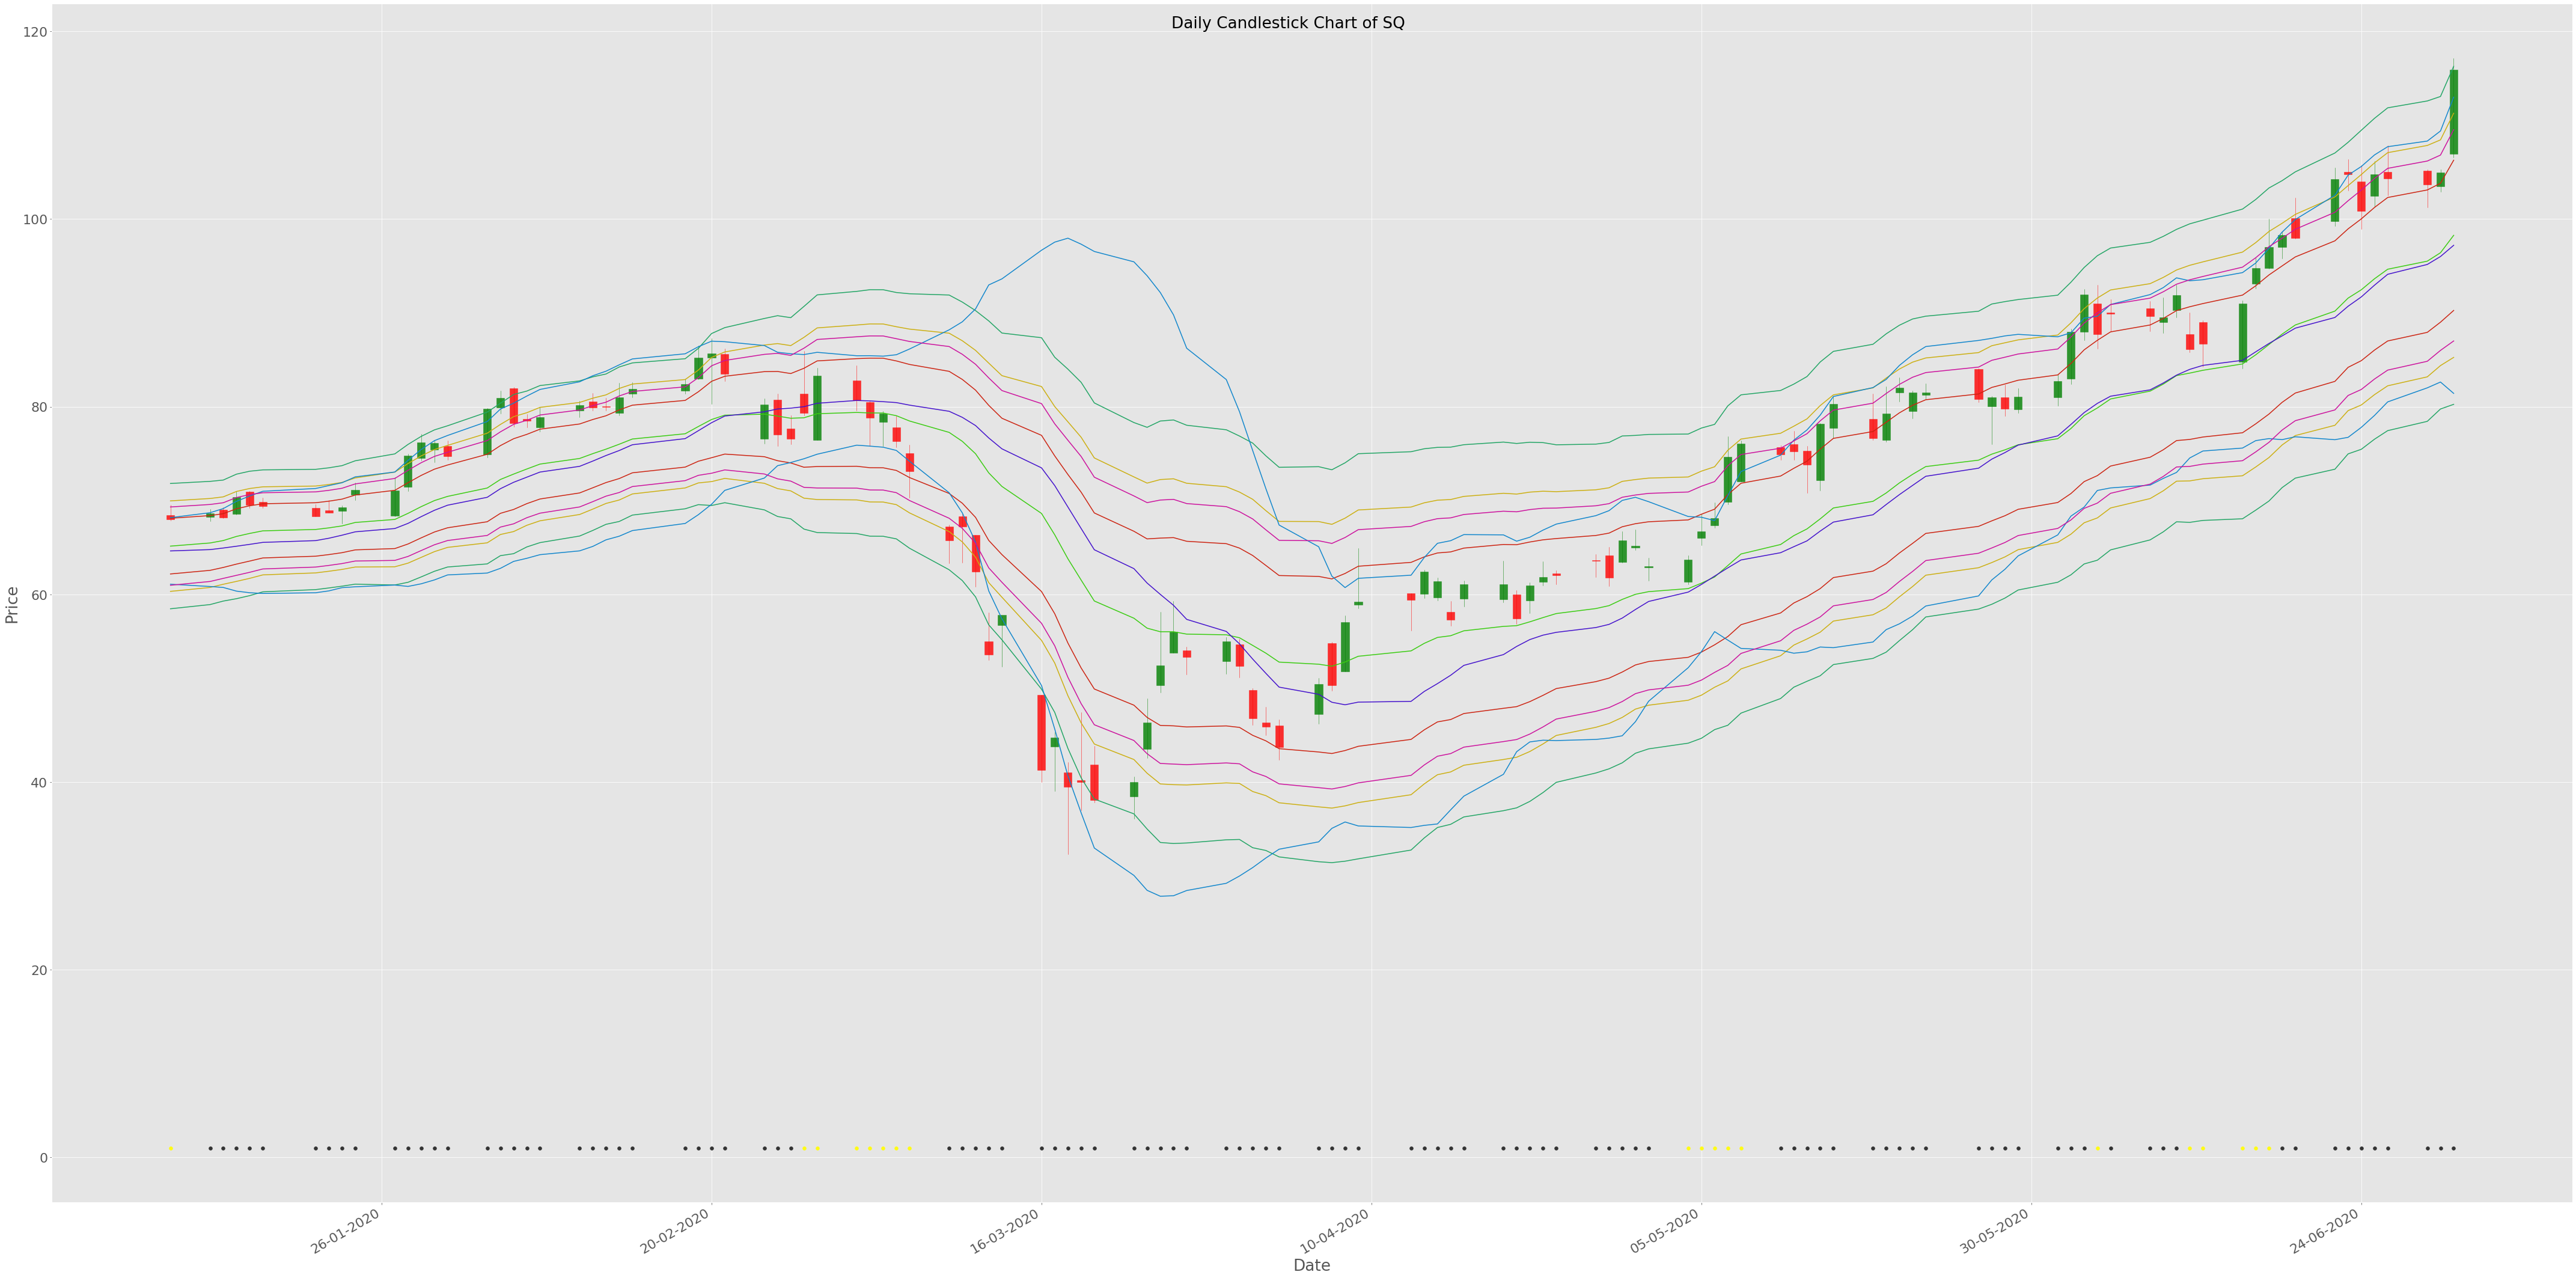

In [32]:
fig , axs = plt.subplots(figsize=(60,30),facecolor='white')
candlestick_ohlc(axs, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)
axs.set_xlabel('Date')
axs.set_ylabel('Price')
fig.suptitle('Daily Candlestick Chart of SQ')

for c in required_columns:
  axs.plot(lp_data.date,lp_data[c],color=colors[c])
for c in cir_columns:
  axs.scatter(circles.date,circles[c],c=colors[c])

date_format = mpl_dates.DateFormatter('%d-%m-%Y')
axs.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()
fig.tight_layout()
